### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
import pandas as pd
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [64]:
#find missing values in data
import pandas as pd
df = pd.read_csv('data/coupons.csv')
print("\n=== Missing Values ===")
missing = df.isnull().sum().sort_values(ascending=False)
print(missing)


=== Missing Values ===
car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
destination                 0
passanger                   0
direction_opp               0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
occupation                  0
education                   0
has_children                0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [65]:
import pandas as pd
df = pd.read_csv('data/coupons.csv')
print("\n=== Missing Value Percentages ===")
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
print(missing_percent)
#drop car column
df = df.drop(columns=['car'])
#after dropping car column print percent
missing_percent1 = (df.isnull().mean() * 100).sort_values(ascending=False)
print(missing_percent1)


=== Missing Value Percentages ===
car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
destination              0.000000
passanger                0.000000
direction_opp            0.000000
direction_same           0.000000
toCoupon_GEQ25min        0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ5min         0.000000
income                   0.000000
occupation               0.000000
education                0.000000
has_children             0.000000
maritalStatus            0.000000
age                      0.000000
gender                   0.000000
expiration               0.000000
coupon                   0.000000
time                     0.000000
temperature              0.000000
weather                  0.000000
Y                        0.000000
dtype: float64
CoffeeHouse             1.710817
Restaurant20To50        1.490066


4. What proportion of the total observations chose to accept the coupon?



In [66]:
import pandas as pd
df = pd.read_csv('data/coupons.csv')
# Calculate proportion of accepted coupons (Y = 1)
proportion_accepted = df['Y'].mean()*100
print("Proportion of accepted coupons:", proportion_accepted)

Proportion of accepted coupons: 56.84326710816777


5. Use a bar plot to visualize the `coupon` column.

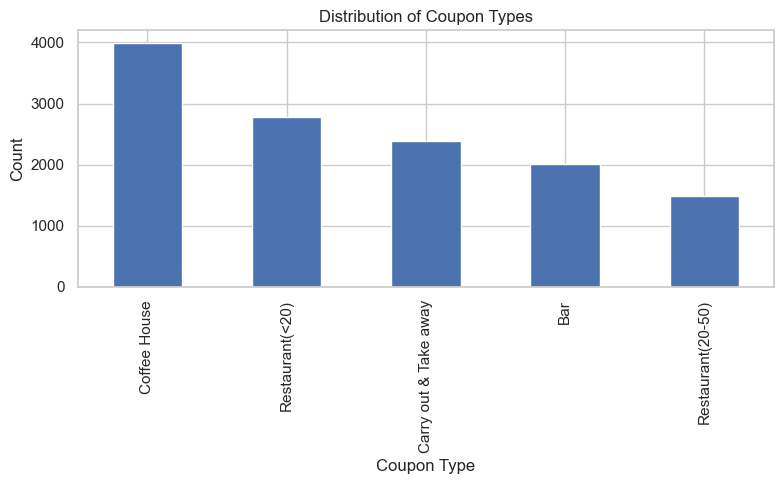

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('data/coupons.csv')

# Count the number of each coupon type
counts = df['coupon'].value_counts()

# Create bar plot
plt.figure(figsize=(8, 5))
counts.plot(kind='bar')

# Labels and title
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.title('Distribution of Coupon Types')

plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

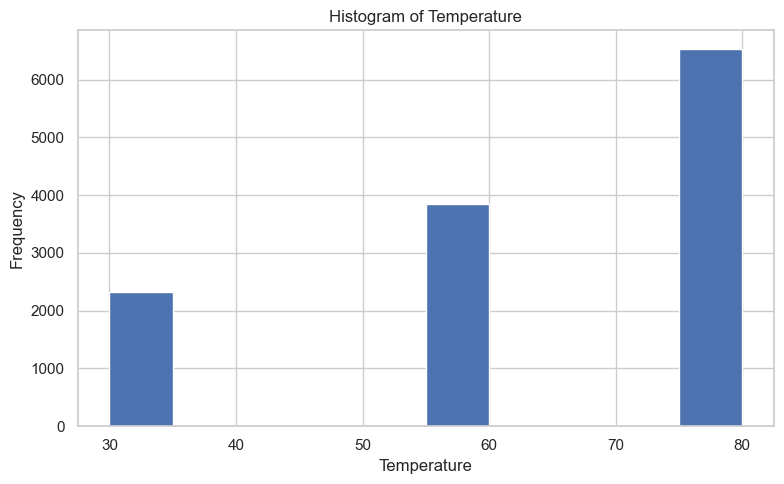

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('data/coupons.csv')

# Create histogram
plt.figure(figsize=(8, 5))
plt.hist(df['temperature'])   # no colors specified

# Labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')

plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [69]:
#Create data frame to create Bar Coupons, rows and columns
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('data/coupons.csv')
coupon_bar = df[df['coupon'] == 'Bar']
print(coupon_bar)

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

2. What proportion of bar coupons were accepted?


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('data/coupons.csv')
df = df[df['coupon'] == 'Bar']
accepted= df['Y'].mean()*100
print("accepted Bar coupons", accepted)

41.00148735746158


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('data/coupons.csv')
df_bar = df[df['coupon'] == 'Bar']
lowCount = df_bar[df_bar['Bar'].isin(['never', 'less1', '1~3'])]['Y'].mean()*100
highCount = df_bar[df_bar['Bar'].isin(['gt8', '4~8'])]['Y'].mean()*100
print('lowCount- bar 3 times', lowCount)
print('highCount-more than 3', highCount)

lowCount 37.061769616026716
highCount 76.88442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


# import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('data/coupons.csv')
groupA = df[
    df['Bar'].isin(['1~3', '4~8', 'gt8']) &             # Goes to bar >1/month
    df['age'].isin(['26', '31', '36', '46', '50plus'])]  # Over age 25
]

groupB = df.drop(groupA.index)
acceptA = groupA.mean()*100
acceptB = groupB.mean()*100

print("acceptA",acceptA)
print("acceptB",acceptB)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [8]:
import pandas as pd

# Load dataset
df = pd.read_csv('data/coupons.csv')

# Convert age column into numeric bins if needed
# Age categories in this dataset look like: 'below21', '21', '26', '31', '36', '46', '50plus'

# --- Filter for Group A ---
groupA = df[
    df['Bar'].isin(['1~3', '4~8', 'gt8']) &             # Goes to bar >1/month
    df['age'].isin(['26', '31', '36', '46', '50plus']) & # Over age 25
    (df['age'] != 'Farming') &
    (df['age'] != 'Fishing') &
    (df['age'] != 'Forestry')

]

# --- Group B = everyone else ---
groupB = df.drop(groupA.index)

# --- Calculate acceptance rates ---
acceptA = groupA['Y'].mean() * 100
acceptB = groupB['Y'].mean() * 100

print("Acceptance rate (Bar >1/month & Age >25):", acceptA)
print("Acceptance rate (All others):", acceptB)

Acceptance rate (Bar >1/month & Age >25): 61.99376947040498
Acceptance rate (All others): 55.5357848952155


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [57]:
import pandas as pd

# Load dataset
df = pd.read_csv('data/coupons.csv')
groupA = df[
    df['Bar'].isin(['1~3', '4~8', 'gt8']) &  
    df['passanger'].isin(['Alone', 'Friend(s)', 'Partner']) &
    (df['maritalStatus'] != 'Widowed')
]
groupB = df[
    df['Bar'].isin(['1~3', '4~8', 'gt8']) &  
    df['age'].isin(['below21', '21', '26'])] 
 
groupC = df[
    df['RestaurantLessThan20'].isin(['4~8', 'gt8']) &  
    df['income'].isin(['Less than $12500',
 '$12500-$24999',
 '$25000-$37499',
 '$37500-$49999'])] 
# go to bars more than once a month, had passengers that were not a kid, and were not widowed  
acceptA = groupA['Y'].mean()*100
#go to bars more than once a month and are under the age of 30 OR
acceptB = groupB['Y'].mean()*100
#go to cheap restaurants more than 4 times a month and income is less than 50K.
acceptC = groupC['Y'].mean()*100

print('acceptA',acceptA)
print('acceptB',acceptB)
print('acceptC',acceptC)


acceptA 62.310606060606055
acceptB 62.808098591549296
acceptC 62.745098039215684


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Drivers who accept bar coupons are typically socially active individuals who already visit bars or restaurants regularly, are not constrained by family responsibilities, and are receptive to discounts that align with their existing lifestyle

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [17]:
#Retrieve passanger as Friends category who accept the coupons in descending age 
import pandas as pd

df = pd.read_csv('data/coupons.csv')

# Filter passengers who are with friends
groupA = df[df['passanger'] == 'Friend(s)']

# Group by age and calculate acceptance rate
age_group = groupA.groupby('age')['Y'].mean().sort_values(ascending=False) * 100

print("Acceptance rate by age (with friends):")
print(age_group)


Acceptance rate by age (with friends):
age
26         72.554745
below21    71.212121
21         69.701087
41         67.509025
31         66.391753
46         65.284974
36         63.722397
50plus     59.196617
Name: Y, dtype: float64


In [ ]:
#Retrieve passengers who accepted the coupons -grouped by age, gender = Female, descending order

In [18]:
import pandas as pd
df = pd.read_csv('data/coupons.csv')
groupA = df[
     (df['passanger'].isin(['Friend(s)'])) &
    (df['gender'] == 'Female')].groupby('age')['Y'].mean().sort_values(ascending=False)*100

print('groupA', groupA)

groupA age
26         80.000000
below21    71.428571
21         70.461538
36         65.034965
31         63.940520
41         63.354037
46         61.052632
50plus     55.234657
Name: Y, dtype: float64


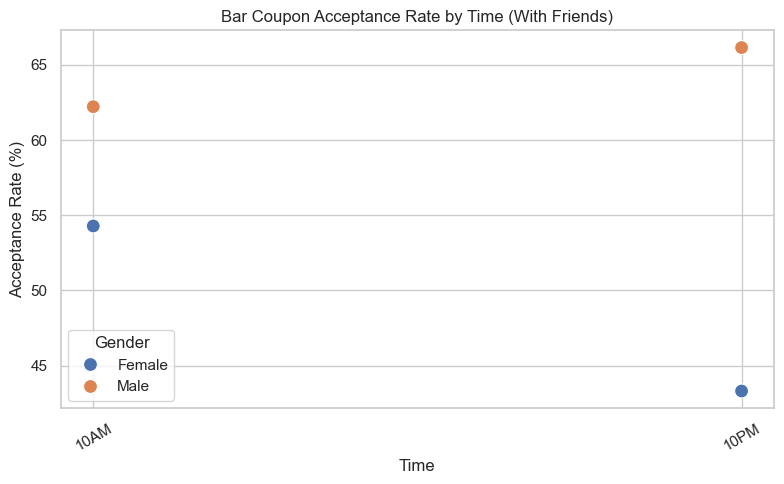

groupA time
10AM    54.285714
10PM    43.307087
Name: Y, dtype: float64
groupB time
10AM    62.222222
10PM    66.153846
Name: Y, dtype: float64


In [28]:
#Retrieve passengers who accepted the coupons -grouped by age, gender based ,time,passenger = Friend(s)  descending order
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('data/coupons.csv')
groupA = df[
     (df['passanger'].isin(['Friend(s)'])) &
    (df['gender'] == 'Female') &
    (df['coupon'] == 'Bar')].groupby('time')['Y'].mean()*100
   

groupB = df[
     (df['passanger'].isin(['Friend(s)'])) &
    (df['gender'] == 'Male') &
    (df['coupon'] == 'Bar')].groupby('time')['Y'].mean()*100



# Convert to DataFrames
groupA_df = groupA.reset_index()
groupA_df.columns = ['Time', 'Acceptance Rate (%)']
groupA_df['Gender'] = 'Female'

groupB_df = groupB.reset_index()
groupB_df.columns = ['Time', 'Acceptance Rate (%)']
groupB_df['Gender'] = 'Male'

combined = pd.concat([groupA_df, groupB_df ])

sns.set_theme(style='whitegrid')
plt.figure(figsize=(8, 5))
sns.scatterplot(data=combined, x='Time', y='Acceptance Rate (%)', hue='Gender', s=100, palette='deep')
plt.title('Bar Coupon Acceptance Rate by Time (With Friends)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

print('groupA', groupA)
print('groupB', groupB)

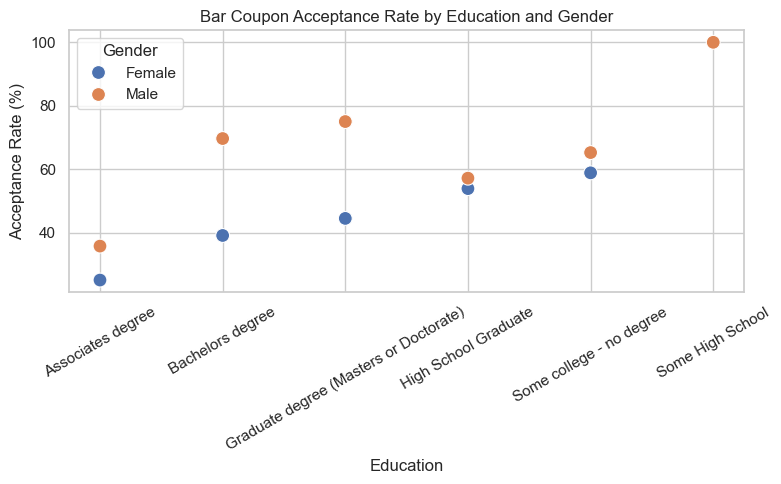

groupA education
Associates degree                         25.000000
Bachelors degree                          39.062500
Graduate degree (Masters or Doctorate)    44.444444
High School Graduate                      53.846154
Some college - no degree                  58.823529
Name: Y, dtype: float64
groupB education
Associates degree                          35.714286
Bachelors degree                           69.642857
Graduate degree (Masters or Doctorate)     75.000000
High School Graduate                       57.142857
Some High School                          100.000000
Some college - no degree                   65.217391
Name: Y, dtype: float64


In [35]:
#Retrieve passengerswho belong to Friend(s), who accepted Bar coupons, grouped by Education, and gender based
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/coupons.csv')
groupA = df[
     (df['passanger'].isin(['Friend(s)'])) &
    (df['gender'] == 'Female') &
    (df['coupon'] == 'Bar')].groupby('education')['Y'].mean()*100
    
groupB = df[
     (df['passanger'].isin(['Friend(s)'])) &
    (df['gender'] == 'Male') &
    (df['coupon'] == 'Bar')].groupby('education')['Y'].mean()*100

groupA_df = groupA.reset_index()
groupA_df.columns = ['Education', 'Acceptance Rate (%)']
groupA_df['Gender'] = 'Female'

groupB_df = groupB.reset_index()
groupB_df.columns = ['Education', 'Acceptance Rate (%)']
groupB_df['Gender'] = 'Male'

combined = pd.concat([groupA_df, groupB_df ])

# Plot using Seaborn
sns.set_theme(style='whitegrid')
plt.figure(figsize=(8, 5))
sns.scatterplot(data=combined, x='Education', y='Acceptance Rate (%)', hue='Gender', s=100, palette='deep')
plt.title('Bar Coupon Acceptance Rate by Education and Gender')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

print('groupA', groupA)
print('groupB', groupB)

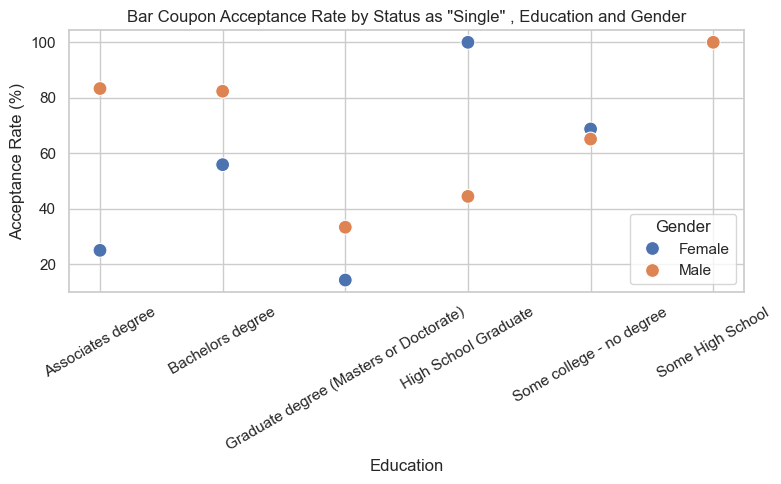

groupA education
Associates degree                          25.000000
Bachelors degree                           55.882353
Graduate degree (Masters or Doctorate)     14.285714
High School Graduate                      100.000000
Some college - no degree                   68.750000
Name: Y, dtype: float64
groupB education
Associates degree                          83.333333
Bachelors degree                           82.352941
Graduate degree (Masters or Doctorate)     33.333333
High School Graduate                       44.444444
Some High School                          100.000000
Some college - no degree                   65.116279
Name: Y, dtype: float64


In [36]:
#Retrieve passengerswho belong to Friend(s), who accepted Bar coupons, grouped by Education,marital Satus = "Single" and gender based
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
df = pd.read_csv('data/coupons.csv')
groupA = df[
     (df['passanger'].isin(['Friend(s)'])) &
    (df['gender'] == 'Female') &
    (df['coupon'] == 'Bar') &
    (df['maritalStatus'] == 'Single')].groupby('education')['Y'].mean()*100
   
groupB = df[
     (df['passanger'].isin(['Friend(s)'])) &
    (df['gender'] == 'Male') &
    (df['coupon'] == 'Bar') &
    (df['maritalStatus'] == 'Single')].groupby('education')['Y'].mean()*100

groupA_df = groupA.reset_index()
groupA_df.columns = ['Education', 'Acceptance Rate (%)']
groupA_df['Gender'] = 'Female'

groupB_df = groupB.reset_index()
groupB_df.columns = ['Education', 'Acceptance Rate (%)']
groupB_df['Gender'] = 'Male'

combined = pd.concat([groupA_df, groupB_df ])

# Plot using Seaborn
sns.set_theme(style='whitegrid')
plt.figure(figsize=(8, 5))
sns.scatterplot(data=combined, x='Education', y='Acceptance Rate (%)', hue='Gender', s=100, palette='deep')
plt.title('Bar Coupon Acceptance Rate by Status as "Single" , Education and Gender')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

print('groupA', groupA)
print('groupB', groupB)

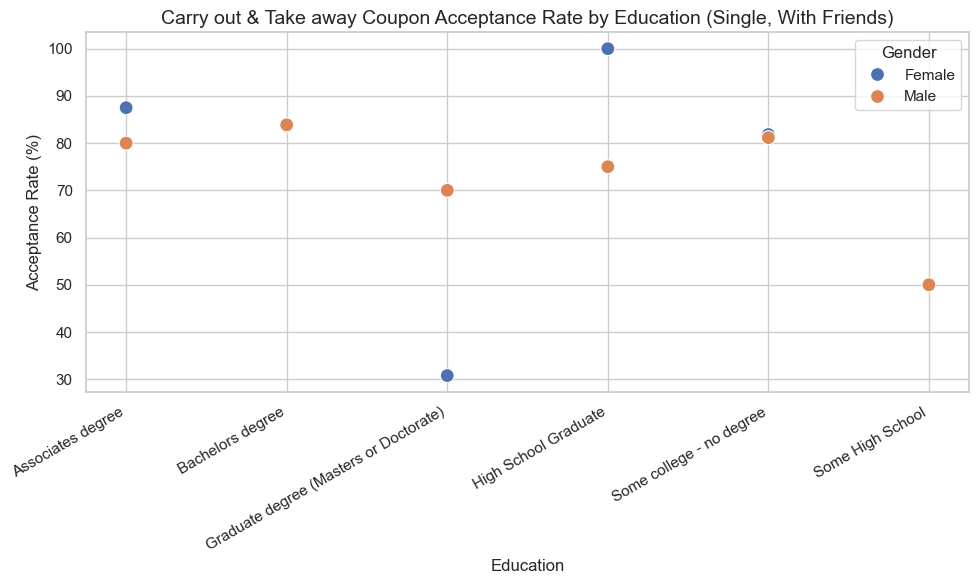

groupA education
Associates degree                          87.500000
Bachelors degree                           83.636364
Graduate degree (Masters or Doctorate)     30.769231
High School Graduate                      100.000000
Some college - no degree                   81.818182
Name: Y, dtype: float64
groupB education
Associates degree                         80.000000
Bachelors degree                          83.870968
Graduate degree (Masters or Doctorate)    70.000000
High School Graduate                      75.000000
Some High School                          50.000000
Some college - no degree                  81.159420
Name: Y, dtype: float64


In [41]:
#Retrieve passengers who belong to Friend(s), who accepted Carry out & Take away coupons, grouped by Education,marital Satus = "Single" and gender based
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
df = pd.read_csv('data/coupons.csv')
groupA = df[
     (df['passanger'].isin(['Friend(s)'])) &
    (df['gender'] == 'Female') &
    (df['coupon'] == 'Carry out & Take away') &
    (df['maritalStatus'] == 'Single')].groupby('education')['Y'].mean()*100
   
groupB = df[
     (df['passanger'].isin(['Friend(s)'])) &
    (df['gender'] == 'Male') &
    (df['coupon'] == 'Carry out & Take away')& 
    (df['maritalStatus'] == 'Single')].groupby('education')['Y'].mean()*100

groupA_df = groupA.reset_index()
groupA_df.columns = ['Education', 'Acceptance Rate (%)']
groupA_df['Gender'] = 'Female'

groupB_df = groupB.reset_index()
groupB_df.columns = ['Education', 'Acceptance Rate (%)']
groupB_df['Gender'] = 'Male'

combined = pd.concat([groupA_df, groupB_df ])

sns.set_theme(style='whitegrid')

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined, x='Education', y='Acceptance Rate (%)',
                hue='Gender', s=100, palette='deep')

# Add title and rotate x labels
plt.title('Carry out & Take away Coupon Acceptance Rate by Education (Single, With Friends)', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Education')

# Save the plot
plt.tight_layout()
plt.show()


print('groupA', groupA)
print('groupB', groupB)

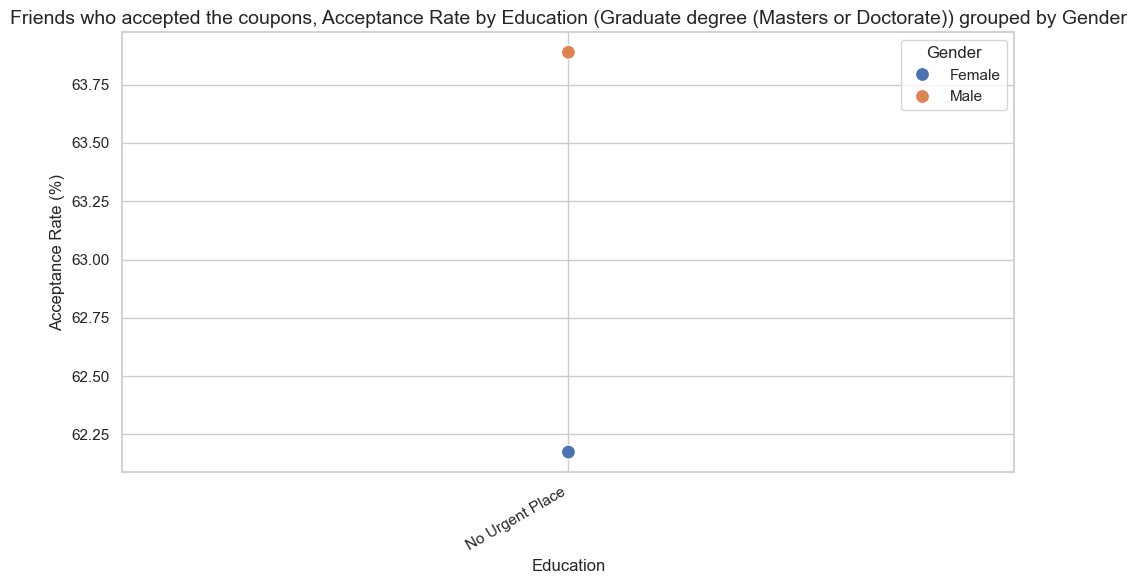

destination
No Urgent Place    62.173913
Name: Y, dtype: float64
destination
No Urgent Place    63.888889
Name: Y, dtype: float64


In [43]:
#Retrieve passengers who belong to Friend(s),gender based, Education= 'Graduate degree (Masters or Doctorate)'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/coupons.csv')

# Female drivers
groupA = (
    df[
        (df['passanger'] == 'Friend(s)') &
        (df['gender'] == 'Female') &
        (df['education'] == 'Graduate degree (Masters or Doctorate)')
    ]
    .groupby('destination')['Y']
    .mean() * 100
  
)

# Male drivers
groupB = (
    df[
        (df['passanger'] == 'Friend(s)') &
        (df['gender'] == 'Male') &
        (df['education'] == 'Graduate degree (Masters or Doctorate)')
    ]
    .groupby('destination')['Y']
    .mean() * 100
   
)
groupA_df = groupA.reset_index()
groupA_df.columns = ['Education', 'Acceptance Rate (%)']
groupA_df['Gender'] = 'Female'

groupB_df = groupB.reset_index()
groupB_df.columns = ['Education', 'Acceptance Rate (%)']
groupB_df['Gender'] = 'Male'

combined = pd.concat([groupA_df, groupB_df ])

sns.set_theme(style='whitegrid')

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined, x='Education', y='Acceptance Rate (%)',
                hue='Gender', s=100, palette='deep')

# Add title and rotate x labels
plt.title('Friends who accepted the coupons, Acceptance Rate by Education (Graduate degree (Masters or Doctorate) grouped by Gender', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Education')

# Save the plot
plt.tight_layout()
plt.show()

print(groupA)
print(groupB)

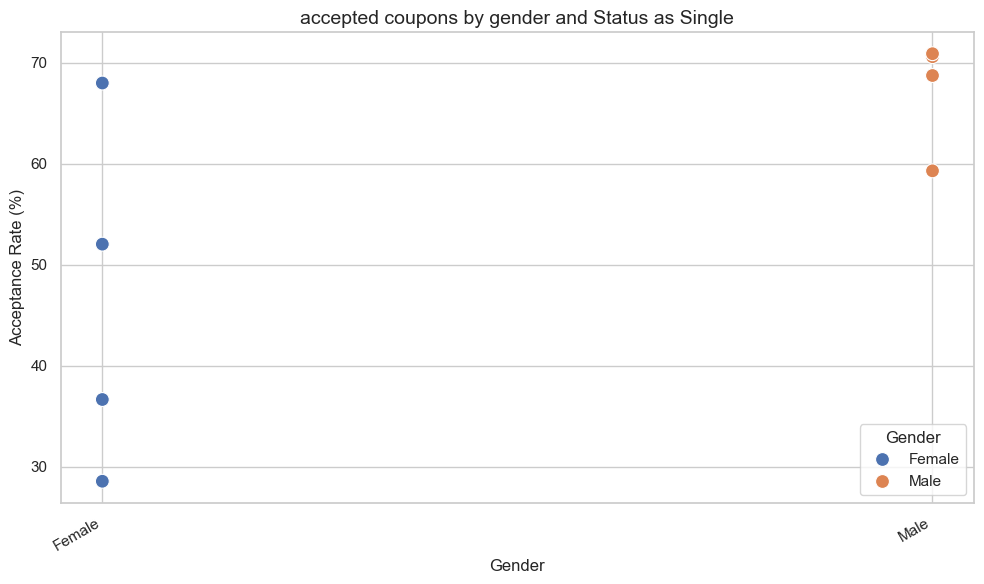

groupA Female passanger
Alone        52.049497
Friend(s)    68.006182
Kid(s)       28.571429
Partner      36.666667
Name: Y, dtype: float64
groupB Male passanger
Alone        59.309967
Friend(s)    70.615034
Kid(s)       68.750000
Partner      70.909091
Name: Y, dtype: float64


In [47]:
#Retrieving accepted coupons by gender and Status as 'Single'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/coupons.csv')
groupA = df[
    (df['gender'] == 'Female') &
    (df['maritalStatus'] == 'Single')].groupby('passanger')['Y'].mean()*100
   
groupB = df[
    (df['gender'] == 'Male') &
    (df['maritalStatus'] == 'Single')].groupby('passanger')['Y'].mean()*100

groupA_df = groupA.reset_index()
groupA_df.columns = ['Education', 'Acceptance Rate (%)']
groupA_df['Gender'] = 'Female'

groupB_df = groupB.reset_index()
groupB_df.columns = ['Education', 'Acceptance Rate (%)']
groupB_df['Gender'] = 'Male'

combined = pd.concat([groupA_df, groupB_df ])

sns.set_theme(style='whitegrid')

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined, x='Gender', y='Acceptance Rate (%)',
                hue='Gender', s=100, palette='deep')

# Add title and rotate x labels
plt.title('accepted coupons by gender and Status as Single', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Gender') 

# Save the plot
plt.tight_layout()
plt.show()

print('groupA Female', groupA)
print('groupB Male', groupB)

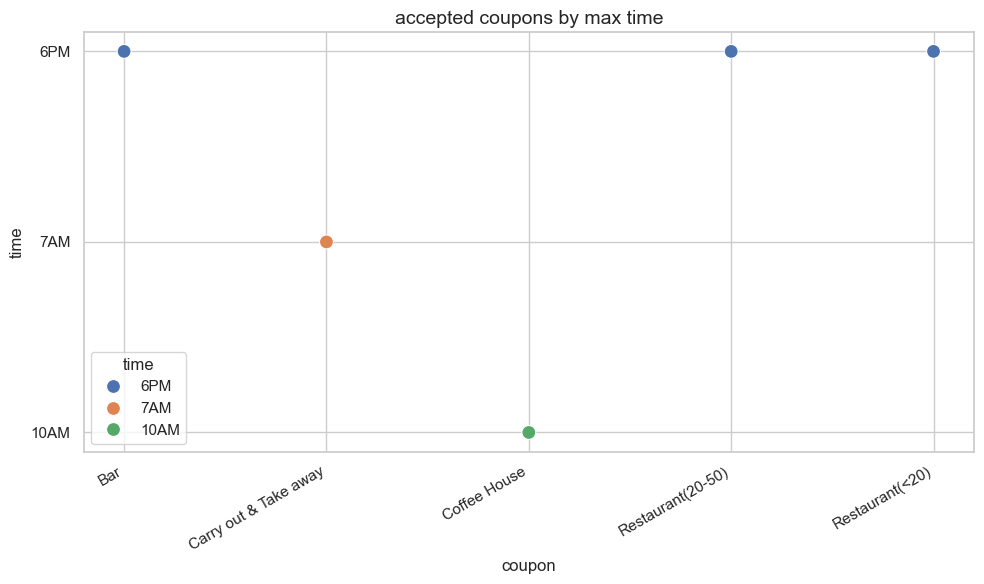

Busiest time for eachprint('Busiest time for each coupon type:')                    coupon  time    Y
3                     Bar   6PM  264
9   Carry out & Take away   7AM  499
10           Coffee House  10AM  576
18      Restaurant(20-50)   6PM  195
23        Restaurant(<20)   6PM  619


In [63]:
#max time the restaurant is busy for a specific coupon type
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_csv('data/coupons.csv')

# Group by coupon and time, count accepted coupons
busy_times = df.groupby(['coupon', 'time'])['Y'].sum().reset_index()

# For each coupon, find the time with the maximum accepted coupons
max_busy_times = busy_times.loc[busy_times.groupby('coupon')['Y'].idxmax()]

sns.set_theme(style='whitegrid')

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=max_busy_times, x='coupon', y='time',
                hue='time', s=100, palette='deep')

# Add title and rotate x labels
plt.title('accepted coupons by max time', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.ylabel('time')
plt.xlabel('coupon') 

# Save the plot
plt.tight_layout()
plt.show()

print("Busiest time for eachprint('Busiest time for each coupon type:')",max_busy_times )

